# 1-3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [4]:
#import data set
df= pd.read_csv(r'C:\Users\Riley\Desktop\Data Any\A6\Data\Prepared Data\Airlines_Cleaned_3.csv')

In [5]:
# check
df.head()

,id,Airline,Flight,AirportFrom,StateFrom,AirportTo,StateTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,California,IAH,Texas,3,15,205,1
1,2,US,1558,PHX,Arizona,CLT,North Carolina,3,15,222,1
2,3,AA,2400,LAX,California,DFW,Texas,3,20,165,1
3,4,AA,2466,SFO,California,DFW,Texas,3,20,195,1
4,5,AS,108,ANC,Alaska,SEA,Washington,3,30,202,0


In [15]:
dups = df.duplicated()

In [16]:
#No dups
dups.shape 

(539383,)

In [7]:
df1 = df[['Airline','AirportFrom','StateFrom','AirportTo','StateTo','DayOfWeek','Time','Length','Delay']]

In [8]:
df1.head()

,Airline,AirportFrom,StateFrom,AirportTo,StateTo,DayOfWeek,Time,Length,Delay
0,CO,SFO,California,IAH,Texas,3,15,205,1
1,US,PHX,Arizona,CLT,North Carolina,3,15,222,1
2,AA,LAX,California,DFW,Texas,3,20,165,1
3,AA,SFO,California,DFW,Texas,3,20,195,1
4,AS,ANC,Alaska,SEA,Washington,3,30,202,0


In [9]:
#Looking for odd values
df1.describe()

,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000
mean,3.929668,802.728963,132.202007,0.445442
std,1.914664,278.045911,70.117016,0.497015
min,1.000000,10.000000,0.000000,0.000000
25%,2.000000,565.000000,81.000000,0.000000
50%,4.000000,795.000000,115.000000,0.000000
75%,5.000000,1035.000000,162.000000,1.000000
max,7.000000,1439.000000,655.000000,1.000000


# 4

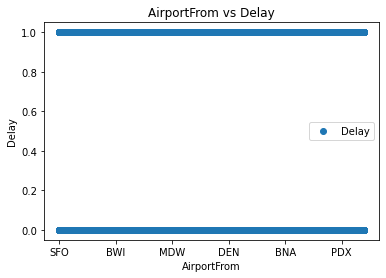

In [24]:
# Create a scatterplot 

df1.plot(x = 'AirportFrom', y='Delay',style='o')
plt.title('AirportFrom vs Delay')  
plt.xlabel('AirportFrom')  
plt.ylabel('Delay')  
plt.show()

#5
My hypothesis is that the larger states like California and Texas would generally have a larger number of delay due to the higgher number of flights going through them.

Graphing this is difficult due to the nature of my columns. Delays being in binary seems to muddle just about any insight I would get through these types of charts.

# 6

In [31]:
# Reshape variables 

X = df['Length'].values.reshape(-1,1)
y = df['Delay'].values.reshape(-1,1)

In [32]:
X

array([[205],
       [222],
       [165],
       ...,
       [255],
       [313],
       [301]], dtype=int64)

In [33]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int64)

# 7

In [34]:
#Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 8

In [35]:
#Create a regression object.

regression = LinearRegression()

In [36]:
regression.fit(X_train, y_train)

LinearRegression()

In [38]:
y_predicted = regression.predict(X_test)

# 9

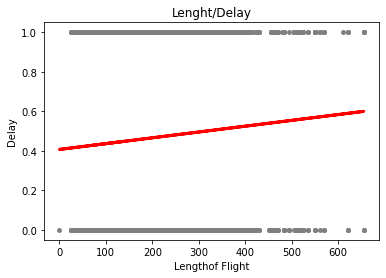

In [39]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Lenght/Delay')
plot_test.xlabel('Lengthof Flight')
plot_test.ylabel('Delay')
plot_test.show()

#10
Outliers show some intersting results as the line remains fairly consistent until about 450 then begins to fluctuate a bit. The outlier at 0-10 area is also strage since its the main difference between two lines.

# 11

In [40]:
#Mean Squared and R2 Score
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0002941]]
Mean squared error:  0.2465292080218456
R2 score:  0.001432051232161724


In [42]:
y_predicted

array([[0.42917958],
       [0.43594382],
       [0.43212055],
       ...,
       [0.47035317],
       [0.47535282],
       [0.44623721]])

In [43]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.429180
1,0,0.435944
2,0,0.432121
3,1,0.438002
4,0,0.446531
5,1,0.445061
6,0,0.418004
7,1,0.476235
8,0,0.432121
9,0,0.430650


#12 
It looks like the model did the best it could with the binary, but giving a median/average number as the predicted value.

In [44]:
y_predicted_train = regression.predict(X_train)

In [45]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [46]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0002941]]
Mean squared error:  0.24665755109381213
R2 score:  0.0017209245407567852


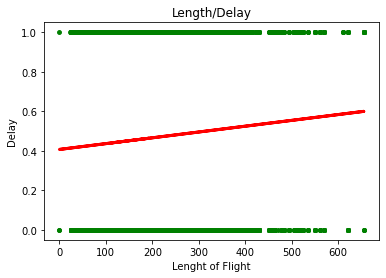

In [47]:
# Visualizing Training Set

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Length/Delay')
plot_test.xlabel('Lenght of Flight')
plot_test.ylabel('Delay')
plot_test.show()

#13
Overall the test performed well, but as I said before the binary nature of the delay column makes the results kind of one dimensional. We can see some slight changes and outliers that could prove to be useful, but overall I think different methods will be more useful for extracting some real insights from this.